In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['PROJ_LIB'] = r'C:/Users/mastr/miniconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import netCDF4 as nc
import matplotlib.gridspec as gridspec

In [2]:
## Function for creating a path, if needed ##
def checkDir(out_path):
    if not os.path.exists(out_path):
        os.makedirs(out_path)

#### ======== Set the paths ========####

# Path for netcdf files
data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget' 


out_path = "/Users/mmastro/Documents/LSCE/RESULTS"
#out_path = '/Users/mmastro/Documents/LSCE/RESULTS'

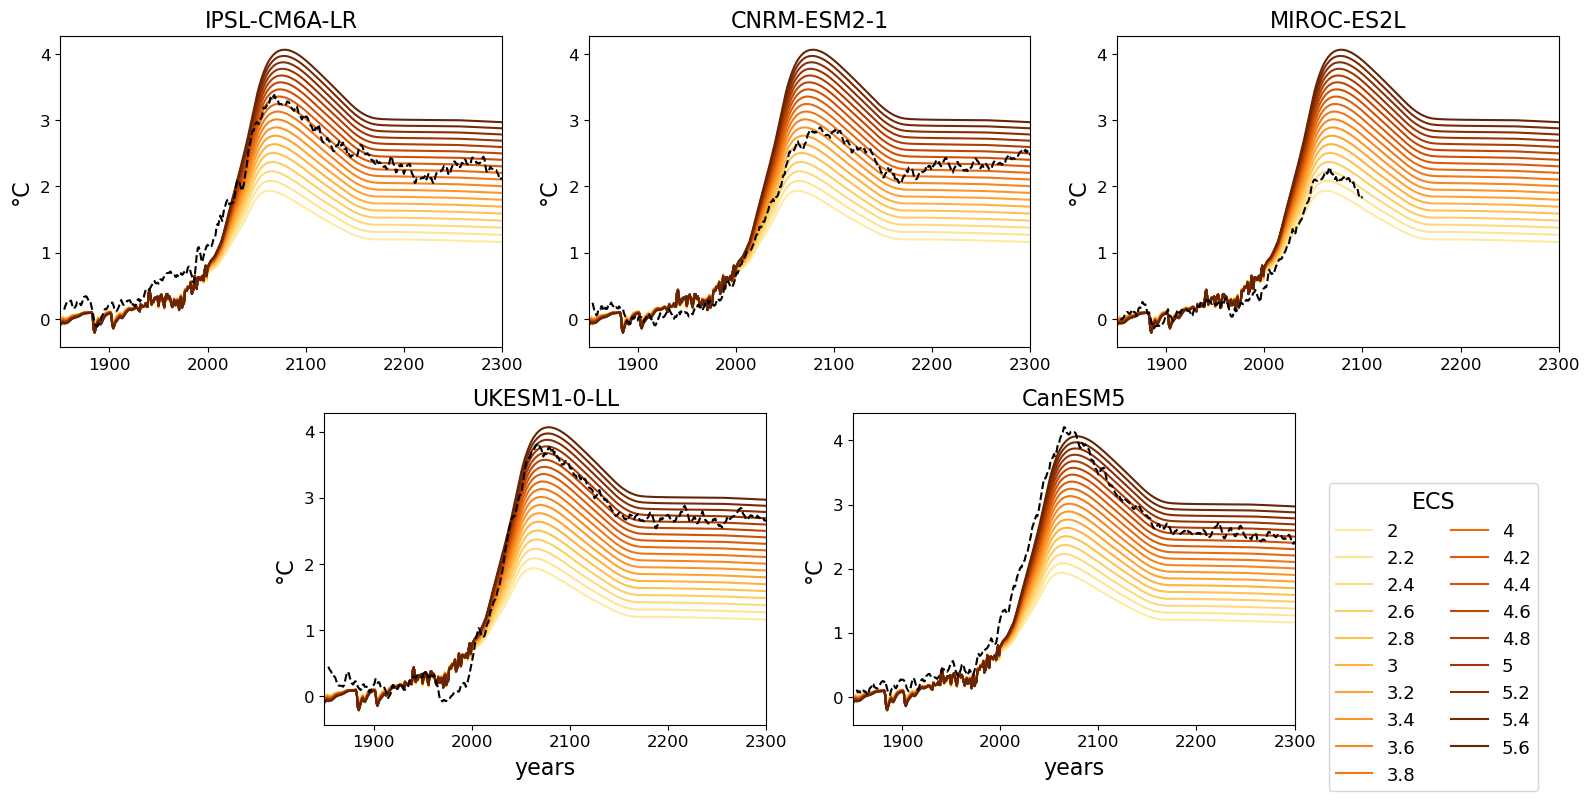

In [16]:
## -- MULTIPLE PLOT 5

## -------------------- DATA ---------------------##

# CO2 = GtC
# CH4 = MtCH4

width_inch = 16
height_inch = 8

file = "/ACC2_ECS.xlsx"
df_acc2 = pd.read_excel(os.path.join(data_path+file), sheet_name = [0,1])
tas_acc2 = df_acc2[0].drop(columns="year", axis=1)
tas_esm = df_acc2[1].drop(columns="year", axis=1)

ecs = tas_acc2.columns
esm = tas_esm.columns

time_acc2 = df_acc2[0].iloc[:,0]
time_esm = df_acc2[1].iloc[100:,0]   
#time_esm = np.repeat(np.arange(1850,2301),1)

## -------------------- IMPORT ---------------------##

fig = plt.figure(figsize=(width_inch, height_inch)) #, constrained_layout=True)
gs = gridspec.GridSpec(2, 6)

title = "ACC2 comparison with ESM, ssp534-over"

# Iteratively create subplots
for i, ax in enumerate(tas_esm.columns):

    if i < 3:
        ax = fig.add_subplot(gs[0, 2 * i:2 * i + 2])
    if ((i > 2) and (i < 5)):
        ax = fig.add_subplot(gs[1, 2 * i - 5:2 * i + 2 - 5])
        ax.set_xlabel('years', labelpad = 5, size = 16)

    color = iter(cm.YlOrBr_r(np.linspace(0.8, 0, len(tas_acc2.T))))
    for x, item in enumerate(tas_acc2.columns):
        c = next(color)
        ax.plot(time_acc2[100:],tas_acc2.iloc[100:,x],label=ecs, color=c, linewidth=1.5)

    ax.plot(time_esm,tas_esm.iloc[100:,i].rolling(window=5).mean(),label=esm[i], color='black', linewidth=1.5, ls='--')
    ax.set_xlim(1850,2300)
    ax.set_ylabel('°C', labelpad = 5, size = 16)
    #ax.label_outer()
    ax.set_title(esm[i], size = 16)
    ax.tick_params(axis='both', which='major', labelsize=12)

fig.legend(ecs, title = "ECS", title_fontsize = 16, loc='upper right',bbox_to_anchor=(0.97, 0.4),fontsize=13, ncol=2)
# fig.suptitle(title, fontsize = 20)
fig.tight_layout()

output_file = os.path.join(out_path,title) + ".png"
# plt.savefig(output_file)
#plt.show()
#plt.close()

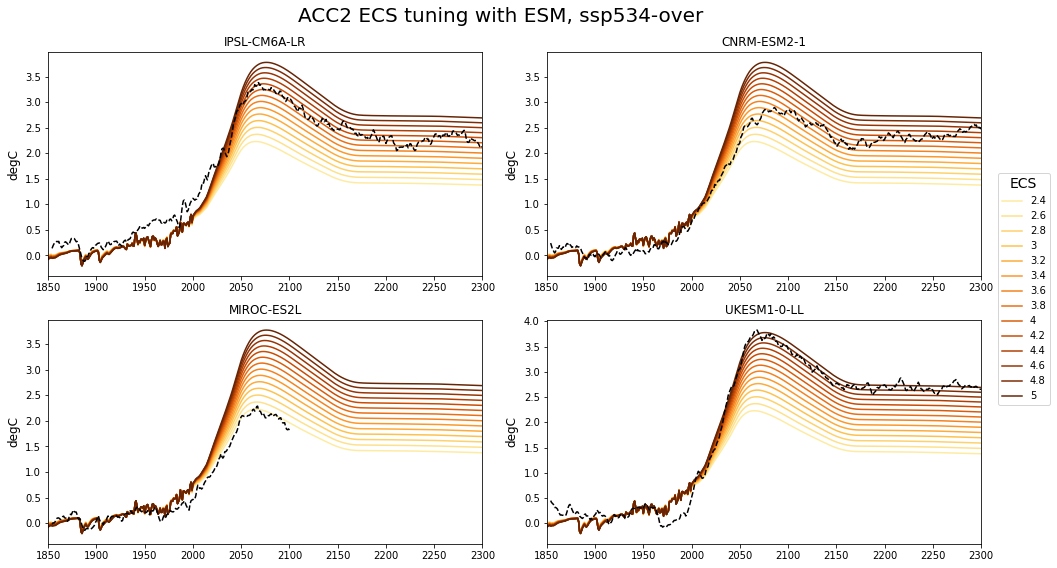

In [21]:
## -- MULTIPLE PLOT 4

## -------------------- DATA ---------------------##

# CO2 = GtC
# CH4 = MtCH4

width_inch = 14
height_inch = 8

file = "/ACC2_ECS.xlsx"
df_acc2 = pd.read_excel(os.path.join(data_path+file), sheet_name = [0,1])
tas_acc2 = df_acc2[0].drop(columns="year", axis=1)
tas_esm = df_acc2[1].drop(columns="year", axis=1)

ecs = tas_acc2.columns
esm = tas_esm.columns

time_acc2 = df_acc2[0].iloc[:,0]
time_esm = df_acc2[1].iloc[100:,0]   
#time_esm = np.repeat(np.arange(1850,2301),1)

## -------------------- IMPORT ---------------------##

fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(width_inch, height_inch)) #, constrained_layout=True)

title = "ACC2 ECS tuning with ESM, ssp534-over"

# Iteratively create subplots
for i, ax in enumerate(axs.flatten()):
    color = iter(cm.YlOrBr_r(np.linspace(0.8, 0, len(tas_acc2.T))))
    for x, item in enumerate(tas_acc2.columns):
        c = next(color)
        ax.plot(time_acc2[100:],tas_acc2.iloc[100:,x],label=ecs, color=c, linewidth=1.5)

    ax.plot(time_esm,tas_esm.iloc[100:,i].rolling(window=5).mean(),label=esm[i], color='black', linewidth=1.5, ls='--')
    ax.set_xlim(1850,2300)

    ax.set_ylabel('degC', labelpad = 5, size = 12)
    #ax.label_outer()
    ax.set_title(esm[i])

fig.legend(ecs, title = "ECS", title_fontsize = 14, loc='upper right',bbox_to_anchor=(1.05, 0.7),fontsize=10)
fig.suptitle(title, fontsize = 20)
fig.tight_layout()

output_file = os.path.join(out_path,title) + ".png"
plt.savefig(output_file, bbox_inches = "tight")
#plt.show()
#plt.close()

In [41]:
## -- Compute RMSE of ESMs and ACC2 Temperature response for the different ECS values considered

df_acc2 = pd.read_excel(os.path.join(data_path+file), sheet_name = [0,1])
tas_acc2 = df_acc2[0].drop(columns="year", axis=1).to_numpy()
tas_esm = df_acc2[1].drop(columns="year", axis=1).to_numpy()

def rmse(predictions, targets):
    return np.sqrt(np.nanmean((predictions-targets)**2))

tas_diff=np.empty((len(esm),len(ecs),1),float)

for m,item in enumerate(esm):
    for i,item in enumerate(ecs):
        content = rmse(tas_esm[:,m],tas_acc2[:,i])
        tas_diff[m,i,:] = content

out_path = "/Users/mmastro/Documents/LSCE/Carbon Budget"
np.savetxt(os.path.join(out_path,"ECS tuning-ssp534"),tas_diff.reshape(tas_diff.shape[0], -1).round(3),fmt="%.3f")


## SSP585

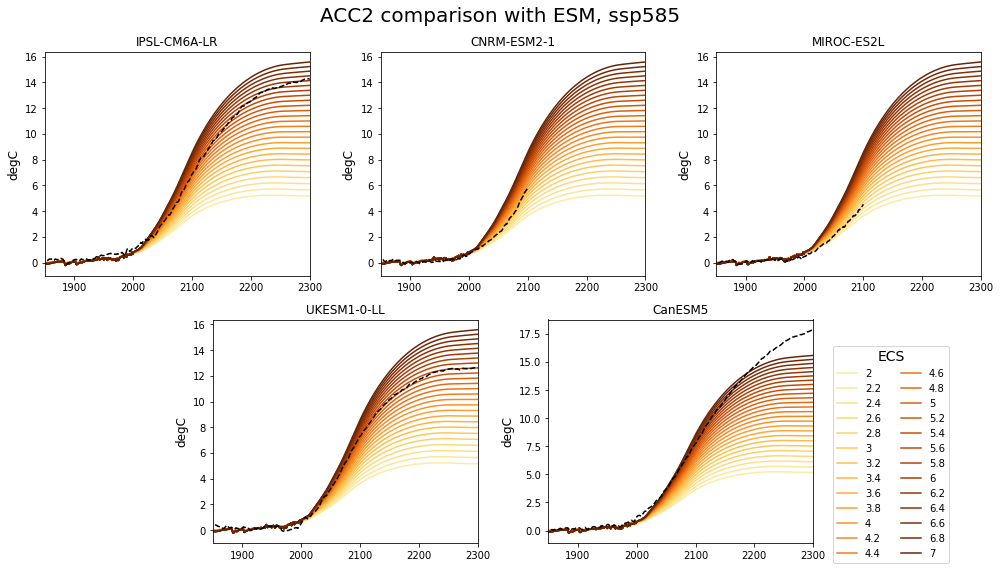

In [60]:
## -------------------- DATA ---------------------##

# CO2 = GtC
# CH4 = MtCH4

width_inch = 14
height_inch = 8

file = "/ACC2_ECS.xlsx"
df_acc2 = pd.read_excel(os.path.join(data_path+file), sheet_name = [2,3])
tas_acc2 = df_acc2[2].drop(columns="year", axis=1)
tas_esm = df_acc2[3].drop(columns="year", axis=1)

ecs = tas_acc2.columns
esm = tas_esm.columns

time_acc2 = df_acc2[2].iloc[:,0]
time_esm = df_acc2[3].iloc[100:,0]   
#time_esm = np.repeat(np.arange(1850,2301),1)


## -------------------- IMPORT ---------------------##
fig = plt.figure(figsize=(width_inch, height_inch)) #, constrained_layout=True)
gs = gridspec.GridSpec(2, 6)

title = "ACC2 comparison with ESM, ssp585"

# Iteratively create subplots
for i, ax in enumerate(tas_esm.columns):

    if i < 3:
        ax = fig.add_subplot(gs[0, 2 * i:2 * i + 2])
    if ((i > 2) and (i < 5)):
        ax = fig.add_subplot(gs[1, 2 * i - 5:2 * i + 2 - 5])

    color = iter(cm.YlOrBr_r(np.linspace(0.8, 0, len(tas_acc2.T))))
    for x, item in enumerate(tas_acc2.columns):
        c = next(color)
        ax.plot(time_acc2[100:],tas_acc2.iloc[100:,x],label=ecs, color=c, linewidth=1.5)

    ax.plot(time_esm,tas_esm.iloc[100:,i].rolling(window=5).mean(),label=esm[i], color='black', linewidth=1.5, ls='--')
    ax.set_xlim(1850,2300)

    ax.set_ylabel('degC', labelpad = 5, size = 12)
    #ax.label_outer()
    ax.set_title(esm[i])

fig.legend(ecs, title = "ECS", title_fontsize = 14, loc='upper right',bbox_to_anchor=(0.95, 0.4),fontsize=10, ncol=2)
fig.suptitle(title, fontsize = 20)
fig.tight_layout()

output_file = os.path.join(out_path,title) + ".png"
plt.savefig(output_file, bbox_inches = "tight")
#plt.show()
#plt.close()

In [61]:
## -- Compute RMSE of ESMs and ACC2 Temperature response for the different ECS values considered

df_acc2 = pd.read_excel(os.path.join(data_path+file), sheet_name = [2,3])
tas_acc2 = df_acc2[2].drop(columns="year", axis=1).to_numpy()
tas_esm = df_acc2[3].drop(columns="year", axis=1).to_numpy()

def rmse(predictions, targets):
    return np.sqrt(np.nanmean((predictions-targets)**2))

tas_diff=np.empty((len(esm),len(ecs),1),float)

for m,item in enumerate(esm):
    for i,item in enumerate(ecs):
        content = rmse(tas_esm[:,m],tas_acc2[:,i])
        tas_diff[m,i,:] = content

out_path = "/Users/mmastro/Documents/LSCE/Carbon Budget"
np.savetxt(os.path.join(out_path,"ECS tuning-ssp585"),tas_diff.reshape(tas_diff.shape[0], -1).round(3),fmt="%.3f")
print(tas_diff.T)

[[[4.89486393 0.65153956 0.32820791 4.35679859 6.4870767 ]
  [4.59702764 0.55975141 0.25344465 4.05646507 6.19018826]
  [4.30512156 0.47331535 0.19997442 3.76198006 5.89916527]
  [4.01905665 0.39287316 0.18123105 3.47323303 5.61390623]
  [3.73875124 0.31975324 0.20218266 3.19011583 5.33431212]
  [3.46413345 0.25664704 0.24973442 2.91252366 5.06028703]
  [3.19514563 0.20873827 0.30946874 2.64035764 4.79173953]
  [2.93174946 0.1840298  0.37377351 2.37352718 4.52858351]
  [2.67393409 0.18818896 0.4392454  2.11195442 4.27073966]
  [2.42172894 0.21682416 0.50433312 1.85558239 4.0181375 ]
  [2.17522083 0.25995525 0.56829486 1.60438654 3.77071514]
  [1.93459078 0.31005296 0.63076875 1.35840672 3.52842625]
  [1.70016426 0.36304701 0.69158088 1.11780328 3.29123838]
  [1.47252201 0.41689102 0.75065977 0.88301838 3.05914554]
  [1.25268786 0.47053862 0.80798991 0.65522686 2.83216587]
  [1.04254086 0.5234383  0.86358792 0.43811839 2.61035489]
  [0.8457196  0.57529443 0.91748842 0.24813172 2.3938239